<a href="https://colab.research.google.com/github/Zain-khan/my_repository/blob/master/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 3
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

x = np.random.rand(4,1,3)
y = np.random.rand(1,3)
result = naive_add_matrix_and_vector(x, y)
print(result)

[[[1.48314034 0.90932232 0.44077485]]

 [[1.9211488  0.67795057 0.86674373]]

 [[1.78675063 1.03024105 0.47226453]]

 [[0.95638238 1.07370261 1.03635343]]]


In [2]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32,10))
z = np.maximum(x, y)

In [3]:
x = np.random.random((1))
y = np.random.random((1))

In [4]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [5]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1,)
Shape of y: (1,)


In [6]:
x = np.random.rand(4,1,3)
y = np.random.rand(1,3)

In [7]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z
x = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7, 8])
print (naive_matrix_vector_dot(x,y))

[23. 53. 83.]


In [8]:
def naive_matrix_vector_dot(x, y):
   z = np.zeros(x.shape[0])
   for i in range(x.shape[0]):
       z[i] = naive_vector_dot(x[i, :], y)
   return z
x = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([9, 2])
print (naive_matrix_vector_dot(x, y))

[13. 35. 57.]


In [9]:
def naive_matrix_dot(x, y):
   assert len(x.shape) == 2
   assert len(y.shape) == 2
   assert x.shape[1] == y.shape[0]
   z = np.zeros((x.shape[0], y.shape[1]))
   for i in range(x.shape[0]):
       for j in range(y.shape[1]):
           row_x = x[i, :]
           column_y = y[:, j]
           z[i, j] = naive_vector_dot(row_x, column_y)
   return z
x = np.array([[1, 2], [3, 4]])
y = np.array([[9, 2],[5, 6]])
print(naive_matrix_dot(x, y))

[[19. 14.]
 [47. 30.]]


In [10]:

x = np.array([[0., 1.],[2., 3.],[4., 5.]])
print(x.shape)

(3, 2)


In [11]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [12]:

x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [13]:

x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


In [14]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,))
layer

In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))
model

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [18]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='mse',
metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [20]:
train_labels[1]

0

In [21]:
max([max(sequence) for sequence in train_data])

9999

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [23]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [26]:

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [28]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [32]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 111ms/step - loss: 0.6932 - acc: 0.4997 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 8/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6931 - 

In [33]:
history

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

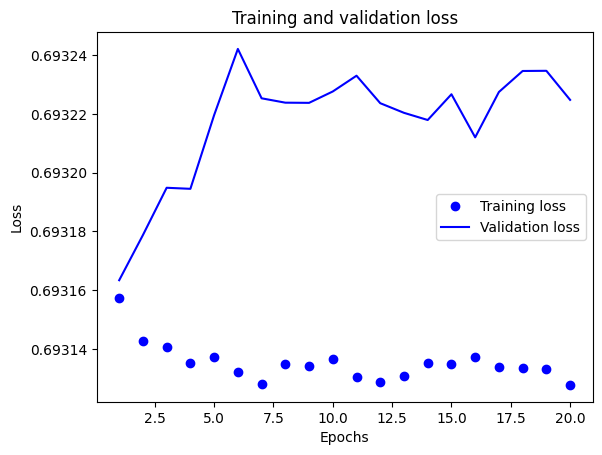

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

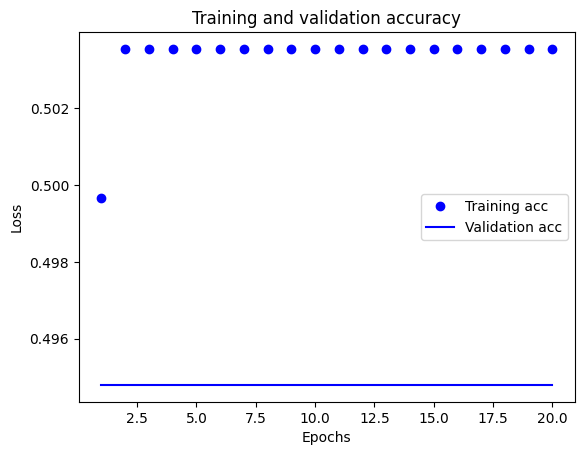

In [36]:

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.6932 - accuracy: 0.4926
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5000


In [38]:
results

[0.6931469440460205, 0.5]

In [39]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.4804389 ],
       [0.49988502],
       [0.49988502],
       ...,
       [0.49988502],
       [0.49988502],
       [0.49988502]], dtype=float32)

In [40]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [41]:
len(train_data)

8982

In [42]:

len(test_data)

2246

In [43]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [44]:
train_labels[10]

3

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
     results = np.zeros((len(sequences), dimension))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [46]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [47]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [48]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [49]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [50]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.6602 - accuracy: 0.4989 - val_loss: 1.7759 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 1s 59ms/step - loss: 1.4797 - accuracy: 0.6838 - val_loss: 1.3355 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 62ms/step - loss: 1.1276 - accuracy: 0.7551 - val_loss: 1.1796 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.9226 - accuracy: 0.7998 - val_loss: 1.0507 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.7664 - accuracy: 0.8315 - val_loss: 0.9870 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6371 - accuracy: 0.8624 - val_loss: 0.9608 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 1s 61ms/step - loss: 0.5269 - accuracy: 0.8877 - val_loss: 0.9034 - val_accuracy: 0.8150
Epoch 8/20
16

In [51]:
history

In [52]:
model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


array([[4.8216557e-06, 1.3717613e-06, 1.0057370e-07, ..., 7.2453480e-07,
        1.5180015e-08, 2.9741612e-08],
       [1.1562322e-05, 4.7384593e-01, 1.0816546e-02, ..., 2.1649314e-05,
        2.2580097e-07, 9.7629139e-03],
       [8.5208594e-05, 9.3876803e-01, 3.4869201e-03, ..., 1.3379069e-05,
        3.1641946e-05, 2.4998860e-04],
       ...,
       [1.6847735e-05, 1.3833659e-04, 1.3402864e-04, ..., 2.3009574e-05,
        3.4270154e-06, 1.5208043e-06],
       [5.7358650e-04, 2.3919459e-01, 3.4272894e-03, ..., 4.7295826e-04,
        1.0312679e-04, 5.5325200e-04],
       [1.9431211e-06, 7.8564250e-01, 1.3864525e-02, ..., 5.8532810e-06,
        6.5503391e-06, 5.1391187e-05]], dtype=float32)

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

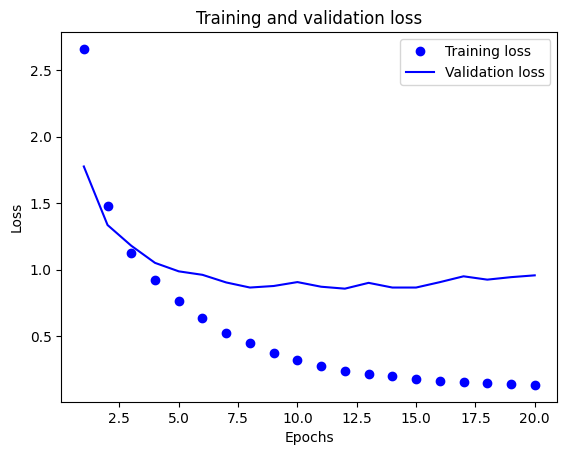

In [54]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

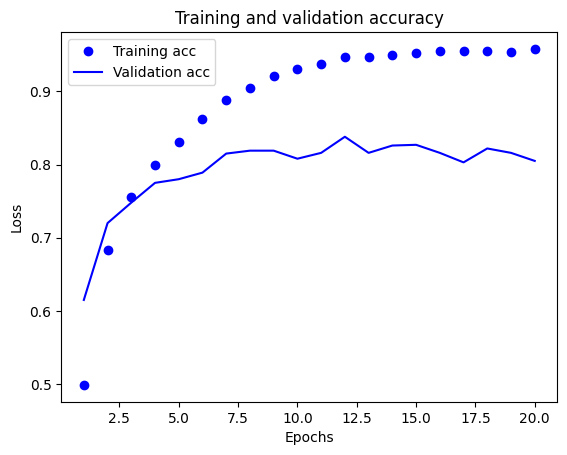

In [55]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 76ms/step - loss: 2.7242 - accuracy: 0.5065 - val_loss: 1.7549 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 82ms/step - loss: 1.4898 - accuracy: 0.6926 - val_loss: 1.3621 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 2s 99ms/step - loss: 1.1554 - accuracy: 0.7511 - val_loss: 1.1762 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 75ms/step - loss: 0.9401 - accuracy: 0.7989 - val_loss: 1.0648 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 1s 60ms/step - loss: 0.7760 - accuracy: 0.8335 - val_loss: 1.0157 - val_accuracy: 0.7960
Epoch 6/9
16/16 [==============================] - 1s 60ms/step - loss: 0.6401 - accuracy: 0.8642 - val_loss: 0.9384 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 59ms/step - loss: 0.5321 - accuracy: 0.8861 - val_loss: 0.9080 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [57]:
results

[0.9301702380180359, 0.792965292930603]

In [58]:

import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> float(np.sum(hits_array)) / len(test_labels)

0.18477292965271594

In [59]:

predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [60]:
np.argmax(predictions[0])

3

In [61]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.1362 - accuracy: 0.2590 - val_loss: 2.3737 - val_accuracy: 0.5550
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 1.9107 - accuracy: 0.5844 - val_loss: 1.7024 - val_accuracy: 0.5890
Epoch 3/20
63/63 [==============================] - 2s 34ms/step - loss: 1.5101 - accuracy: 0.6074 - val_loss: 1.5313 - val_accuracy: 0.5980
Epoch 4/20
63/63 [==============================] - 2s 24ms/step - loss: 1.3126 - accuracy: 0.6382 - val_loss: 1.4161 - val_accuracy: 0.6550
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.1620 - accuracy: 0.6958 - val_loss: 1.3388 - val_accuracy: 0.6670
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 1.0411 - accuracy: 0.7284 - val_loss: 1.2959 - val_accuracy: 0.6820
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9449 - accuracy: 0.7636 - val_loss: 1.2526 - val_accuracy: 0.7050
Epoch 8/20
63

In [62]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [63]:
train_data.shape

(404, 13)

In [64]:
test_data.shape

(102, 13)

In [65]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [66]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [67]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [68]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []
for i in range(k):
   print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate(
[train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]],
axis=0)
partial_train_targets = np.concatenate(
[train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]],
axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets,
epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [69]:
all_scores

[2.5746428966522217]

In [70]:
np.mean(all_scores)

2.5746428966522217

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [72]:

num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate(
   [train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]],
axis=0)
partial_train_targets = np.concatenate(
       [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0)
partial_train_targets = np.concatenate(
     [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
axis=0)
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [73]:
average_mae_history = []
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

SyntaxError: ignored

In [74]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

NameError: ignored

In [75]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

NameError: ignored

In [76]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 18.7813 - mae: 2.6738


In [77]:
test_mae_score

2.673799991607666

In [78]:
#chapter 4

In [79]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [80]:


from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

ValueError: ignored